# IPL 2022 Capstone Project

**The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.**

**These are some of the important columns that we'll focus on for meaningful insights in this project.**

**column names: Variable Type**
- date : string
- venue : string
- stage : string
- team1 : string
- team2 : string
- toss_winner : string
- toss_decision : string
- first_ings_score : integer
- second_ings_score : integer
- match_winner : string
- won_by : string
- margin : integer
- player_of_the_match : string
- top_scorer : string
- highscore : integer
- best_bowling : string
- best_bowling_fgure : string
- gure : string

### Loading Libraries and Datasets

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information

In [3]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
#gives the dimension of df

Number of rows:  74
Number of columns:  20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

#### How many columns have null values

In [5]:
df.isnull().sum()
#The output shows that there is no null value present in the dataset

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

##### 1. Which team won the most matches

Text(0.5, 1.0, 'Most matches won by teams')

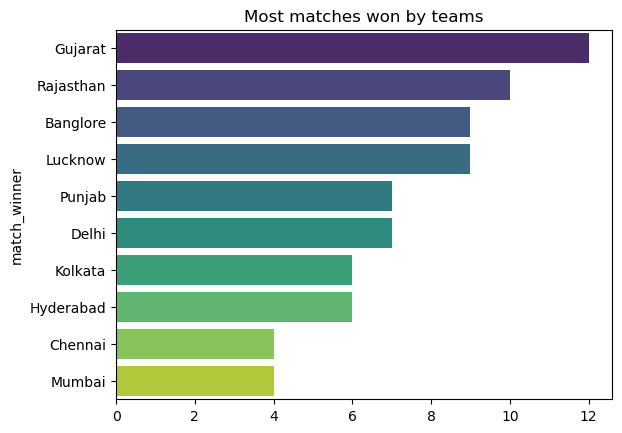

In [6]:
mathch_wins = df['match_winner'].value_counts()
sns.barplot(y = mathch_wins.index, x = mathch_wins.values, palette='viridis')
plt.title("Most matches won by teams")

##### from above plot we can see that Gujrat won most of the matches

Q2. Toss decision trends

Text(0.5, 1.0, 'Toss decision trends')

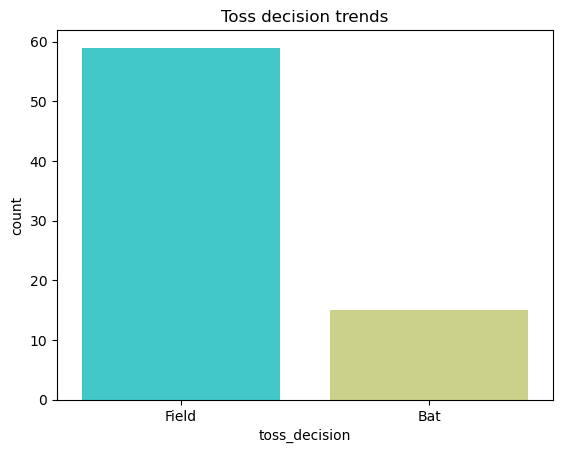

In [7]:
toss_dec = df['toss_decision'].value_counts()
toss_dec
# sns.barplot(x = toss_dec.index, y = toss_dec.values)
sns.countplot(x=df['toss_decision'], palette='rainbow')
plt.title("Toss decision trends")

###### from above count plot we can infer that field was chosen more number of times than Bat

##### Q3. Toss Winner vs Match Winner

In [8]:
toss_n_match_wins = int(df[df['toss_winner'] == df['match_winner']]['match_id'].count())
total_matches = int(df['match_id'].count()) #or you can write df.shape(0)
percentage = (toss_n_match_wins*100)/total_matches
percentage

48.648648648648646

##### Q4. How do teams win? (Runs vs Wickets)


Text(0.5, 1.0, 'Won by: Runs vs Wickets')

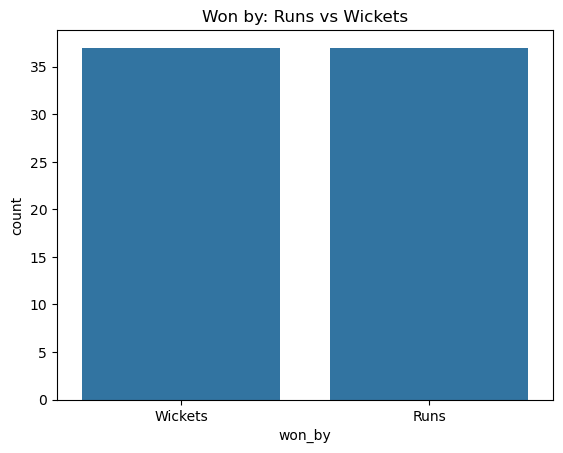

In [9]:
sns.countplot(x = df['won_by'], )
plt.title("Won by: Runs vs Wickets")

### Key Player Performances

##### Q1. Most "Player of the Match" Awards

<Axes: ylabel='player_of_the_match'>

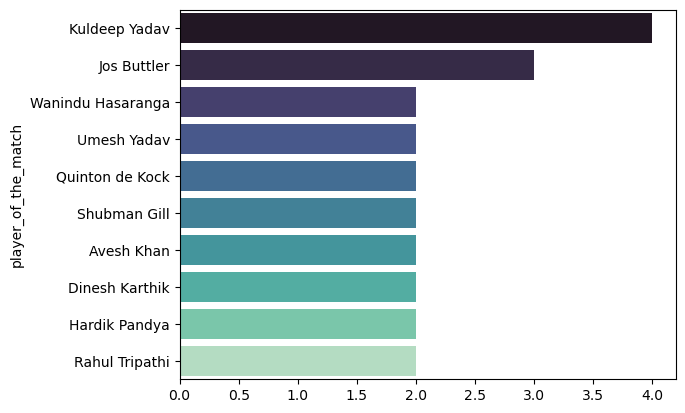

In [10]:
counts = df['player_of_the_match'].value_counts().head(10)
sns.barplot(x = counts.values, y = counts.index, palette='mako')

##### Q2. Top Scorers

In [11]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

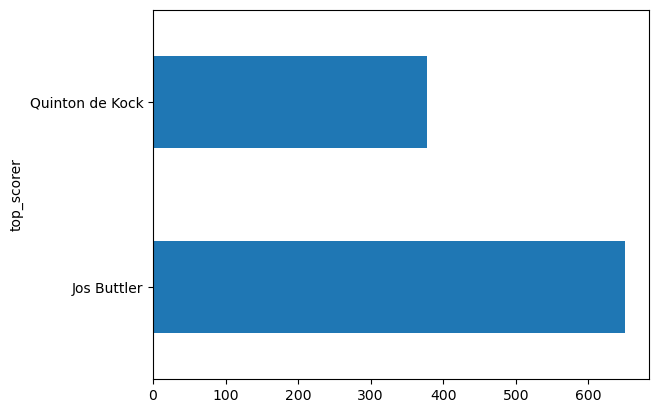

In [12]:
high.plot(kind = 'barh')

##### Q3. 10 Best Bowling Figures

<Axes: ylabel='best_bowling'>

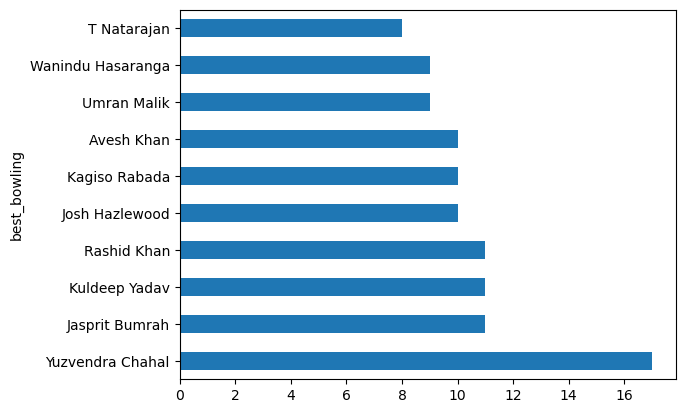

In [19]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False)
top_bowlers
top_bowlers.head(10).plot(kind='barh')

In [20]:
#most match played by venue
venue_count = df['venue'].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

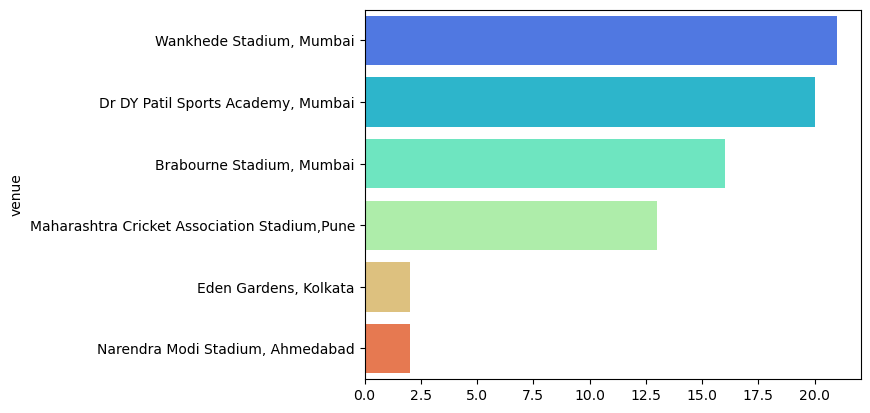

In [21]:
sns.barplot(y=venue_count.index, x = venue_count.values, palette='rainbow')

In [26]:
#Who won the highest margin by runs?
df[df['won_by'] =="Runs"].sort_values(ascending=False, by='margin').head(1)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
54,55,"May 8,2022","Dr DY Patil Sports Academy, Mumbai",Chennai,Delhi,Group,Delhi,Field,208,6,...,10,Chennai,Runs,91,Devon Conway,Devon Conway,87,Moeen Ali,3--13,3


In [30]:
df[df['highscore'] == df['highscore'].max()][['top_scorer', 'highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


In [34]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling', 'best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
